# PROJECT TITLE: 🛒 Shopper Spectrum: Customer Segmentation and Product Recommendations in E-Commerce



##### Project Type    - Clustering and Recomendation
##### Contribution    - Individual/Team
##### Team Member     - Pavan Kumar Dirisala

[🔗 View on GitHub](https://github.com/Pavan-Kumar-Dirisala/Shopper-Spectrum-Customer-Segmentation-and-Product-Recommendations-in-E-Commerce)

# Project Summary -
In today’s competitive e-commerce landscape, understanding customer behavior is crucial for driving retention and personalized marketing. This project focuses on customer segmentation using RFM analysis (Recency, Frequency, Monetary) combined with KMeans clustering to classify users based on their purchasing behavior. The dataset consists of approximately 398,000 retail transactions, containing fields such as InvoiceDate, CustomerID, Quantity, and TotalPrice. After cleaning and preprocessing the data—removing duplicates and computing RFM metrics—we built a profile for each customer: Recency measures how recently a customer made a purchase, Frequency indicates how often they purchase, and Monetary represents their total spending. These features were scaled using StandardScaler and fed into the KMeans algorithm to create clusters. The initial clustering using only standard RFM features (without log transformation or additional engineered features) produced the best performance with a Silhouette Score of 0.6, indicating strong separation between customer groups. Various experiments followed, including applying log transformation, adding derived features like average order value and customer tenure, and testing different values for k. However, these more complex setups often led to lower silhouette scores, confirming that the basic RFM approach was more effective. The clusters were then analyzed and interpreted as four meaningful customer segments: High-Value customers (recent, frequent, and high spenders), Loyal/Regular customers (frequent but slightly lower spending), Medium Value customers (moderate frequency and recency), and At-Risk customers (low frequency and old recency). Each customer was labeled accordingly, creating a foundation for targeted marketing strategies such as loyalty programs, retention campaigns, and win-back offers. This project proves that unsupervised learning, when paired with a clear behavioral framework like RFM, can uncover actionable insights and help businesses tailor strategies to distinct customer groups. Future improvements could include trying soft clustering with Gaussian Mixture Models, anomaly detection with DBSCAN, or visualizing clusters using dimensionality reduction techniques like PCA or t-SNE.

# Problem Statement

In the fast-paced e-commerce industry, businesses often struggle to understand and retain their diverse customer base. With thousands of customers exhibiting varied purchasing behaviors, a one-size-fits-all marketing strategy leads to inefficient resource allocation and poor customer engagement. The lack of an effective segmentation approach prevents businesses from identifying high-value customers, re-engaging inactive users, and tailoring offers to different segments. To address this challenge, the objective of this project is to build a robust customer segmentation model using Recency, Frequency, and Monetary (RFM) analysis combined with KMeans clustering. The goal is to group customers into meaningful clusters based on their transaction history, enabling the business to personalize marketing strategies, improve customer satisfaction, and ultimately drive revenue growth.

## Step 1: Dataset Collection and Understanding

### 1.1 Load Dataset

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("online_retail.csv", encoding='ISO-8859-1')
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


#### 📌 Insight:
#### The dataset consists of transaction-level details including invoice number, product description, quantity, date, unit price, customer ID, and country. The first few rows confirm the dataset is correctly loaded and structured.

### 1.2 Dataset Overview

In [2]:
# Check basic info of dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### 📌 Insight:

#### - Total records: 541,909, with 8 columns.
#### - CustomerID has 135,080 missing values (~25%).
#### - Description has 1,454 missing values.
#### - InvoiceDate is an object — we’ll convert it to datetime later.
#### - CustomerID is float due to missing values but should be treated as an ID

### 1.3 Dataset Summary Statistics

In [3]:
df.describe(include='all')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2023-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


#### 📌 Insight:

🔢 InvoiceNo:

25,900 unique invoices.

Most frequent invoice is 573585 with 1,114 entries — possibly large bulk transactions or duplicates.

📦 StockCode:

4,070 unique products.

StockCode 85123A is most frequent (2,313 times) — a likely bestseller.

📝 Description:

4,223 unique product names.

Top product: WHITE HANGING HEART T-LIGHT HOLDER appeared 2,369 times.

📦 Quantity:

Ranges from -80995 to 80995 — extreme values may be returns or data issues.

Mean = 9.55, but high std deviation = 218 — indicates skewed data.

🕒 InvoiceDate:

23,260 unique timestamps — many individual transactions over time.

Most frequent time: 2023-10-31 14:41:00 (appears 1,114 times — may need investigation).

💰 UnitPrice:

Ranges from -11062.06 to 38970.00.

Negative prices are invalid unless representing returns or discounts — should be cleaned.

Mean unit price = ₹4.61 with a large standard deviation.

👤 CustomerID:

406,829 non-null — ~25% of rows are missing.

ID ranges from 12346 to 18287.

🌍 Country:

38 unique countries.

Most records are from the United Kingdom (495,478 transactions).

###  1.4 Check for Missing Values

In [4]:
df.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#### 📌 Insight:

🧑‍💼 CustomerID has 135,080 missing values — about 25% of the dataset.
This is critical because RFM (Recency, Frequency, Monetary) analysis relies on customer identifiers. These rows may need to be dropped or handled separately.

📝 Description has 1,454 missing values — less critical, but still important for any product-level analysis or when building recommendation systems.

✅ All other columns (InvoiceNo, StockCode, Quantity, InvoiceDate, UnitPrice, Country) are complete with 0 missing values.

###  1.5 Check for Duplicate Records

In [5]:
df.duplicated().sum()


5268

In [6]:
df = df.drop_duplicates()


#### 📌 Insight: 
#### There a total of **5268** duplicate values present in the dataset.

### 1.6 Identify Unusual Records

In [7]:
# Check for negative or zero quantities and prices
df[(df['Quantity'] <= 0) | (df['UnitPrice'] <= 0)]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2022-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2022-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2022-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2022-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2022-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2023-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2023-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2023-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2023-12-09 11:58:00,1.25,17315.0,United Kingdom


#### 📌 Insight:

Found 11,805 rows where Quantity is less than or equal to zero.

These include:

Product returns (e.g., Quantity = -1, -12, -24)

Discounts or placeholder items (e.g., Description = "Manual", "Discount")

Records with unusual StockCode like D, M, or POST.

#### 📌 Action:
For RFM analysis and customer clustering, we may want to exclude returns.

For refund analysis or return rate modeling, we may want to analyze them separately.

Products like "Manual" or "Discount" should be removed from recommendations.

In [8]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df['IsReturn'] = df['Quantity'] < 0


## Step 2: Data Preprocessing

###  2.1 Remove Rows with Missing CustomerID

In [9]:
# Remove rows with missing CustomerID
df_cleaned = df.dropna(subset=["CustomerID"])


#### 📌 Insight:
#### We removed around 135,080 rows with missing CustomerID since they can't be used for customer-based analysis like RFM or personalization.

### 2.2 Remove Cancelled Invoices (InvoiceNo starting with "C")

In [10]:
# Remove cancelled transactions (InvoiceNo starting with 'C')
df_cleaned = df_cleaned[~df_cleaned['InvoiceNo'].astype(str).str.startswith('C')]


In [11]:
df_cleaned['InvoiceNo'].str.startswith('C').sum()  # Should be 0


0

In [12]:
df_cleaned['TotalAmount'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']


#### 📌 Insight:
#### Invoices starting with 'C' represent cancellation or refund transactions. These were removed to focus on actual purchases only.

###  2.3 Remove Rows with Negative or Zero Quantity or Unit Price


In [13]:
# Remove entries with non-positive quantity or unit price
df_cleaned = df_cleaned[(df_cleaned['Quantity'] > 0) & (df_cleaned['UnitPrice'] > 0)]


#### 📌 Insight:
#### This step removes returns, manual placeholders, and data errors (like Quantity = -24 or UnitPrice = 0).These records can bias total monetary value or frequency counts and are not suitable for building clustering or recommendation models.



### 2.4 Convert InvoiceDate to Datetime

In [14]:
# Convert InvoiceDate to datetime format
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])


#### 📌 Insight:
#### This allows us to extract features like Recency, Day, Month, or Year, which are critical for time-based analysis.

### Step 3: Exploratory Data Analysis (EDA)

#### 3.1 Analyze Transaction Volume by Country

<Axes: title={'center': 'Transaction Volume by Country'}, xlabel='Country'>

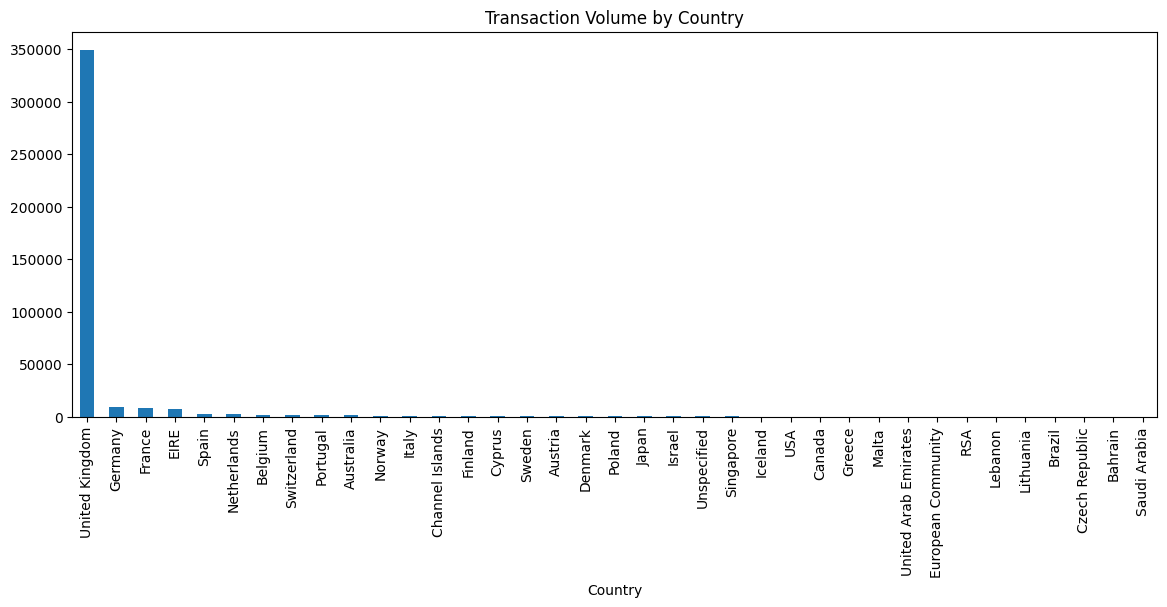

In [15]:
# Top countries by number of transactions
country_txn = df_cleaned['Country'].value_counts().sort_values(ascending=False)
country_txn.plot(kind='bar', figsize=(14,5), title='Transaction Volume by Country')


#### 📌 Insight: Transaction Volume by Country

The United Kingdom overwhelmingly dominates the transaction count with over 350,000 transactions, accounting for ~90%+ of all activity in the dataset.

Other countries like Germany, France, and EIRE (Ireland) contribute significantly less, with their bars nearly negligible in comparison.

This skew indicates that the business is primarily UK-based, and any clustering or segmentation analysis will be heavily influenced by UK customers.

For country-specific strategies (like marketing or inventory), the UK should be the primary focus, while others might be segmented separately or excluded for localized insights.



###  3.2 Identify Top-Selling Products

<Axes: title={'center': 'Top 10 Selling Products'}, xlabel='Description'>

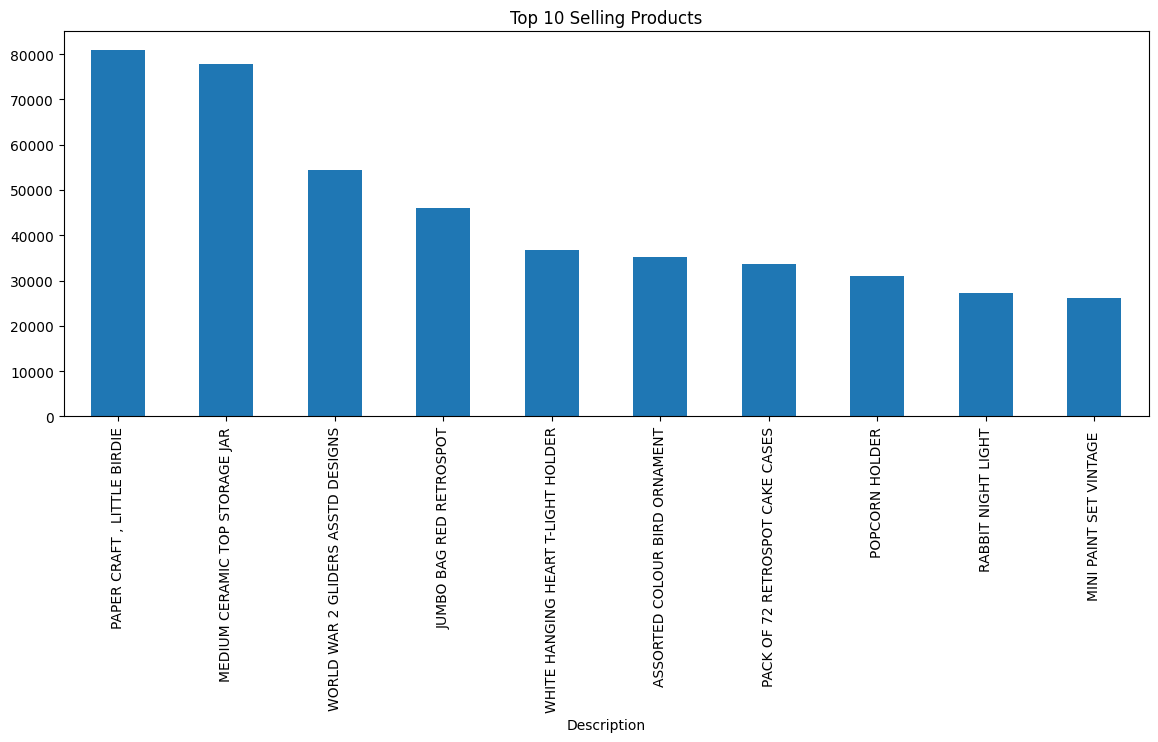

In [16]:
# Top 10 most sold products
top_products = df_cleaned.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', figsize=(14,5), title='Top 10 Selling Products')


#### 📌 Insight: Top 10 Selling Products

The best-selling product is "PAPER CRAFT , LITTLE BIRDIE", with over 80,000 units sold, indicating high popularity — possibly due to affordability or bulk purchases.

"MEDIUM CERAMIC TOP STORAGE JAR" follows closely with a similarly high volume.

Products like "WORLD WAR 2 GLIDERS ASSTD DESIGNS", "JUMBO BAG RED RETROSPOT", and "WHITE HANGING HEART T-LIGHT HOLDER" also stand out as consistent favorites.

Most of the top products are decor items, storage containers, or novelty craft goods, which suggests the store caters to home decor, gifting, or hobby niches.

These high-performing items can be prioritized for inventory planning, promotion, and recommendation systems.

###  3.3 Visualize Purchase Trends Over Time

<Axes: title={'center': 'Daily Purchase Trends'}, xlabel='InvoiceDate'>

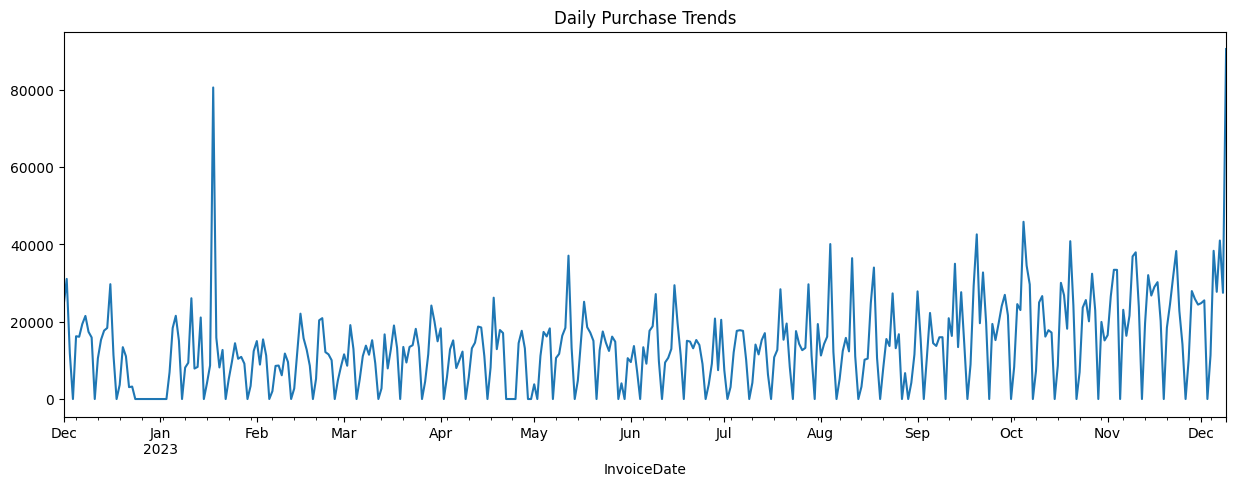

In [17]:
# Daily sales volume
df_cleaned.set_index('InvoiceDate', inplace=True)
daily_sales = df_cleaned.resample('D')['Quantity'].sum()
daily_sales.plot(figsize=(15,5), title='Daily Purchase Trends')


#### 📌 Insight: Daily Purchase Trends

The purchase trend shows consistent daily activity throughout the year, with noticeable growth in volume over time, particularly from August to December.

There are frequent spikes — likely tied to promotions, new product launches, or holiday-driven shopping surges.

A major peak in early February and a sharp surge at the end of December suggest potential seasonal campaigns or clearance events.

The trend highlights stronger customer engagement during Q4, which is typical for e-commerce businesses gearing up for holidays like Black Friday, Christmas, and New Year.

These patterns are valuable for planning inventory, marketing campaigns, and staffing around high-demand periods.



### 3.4 Monetary Distribution per Transaction

<Axes: >

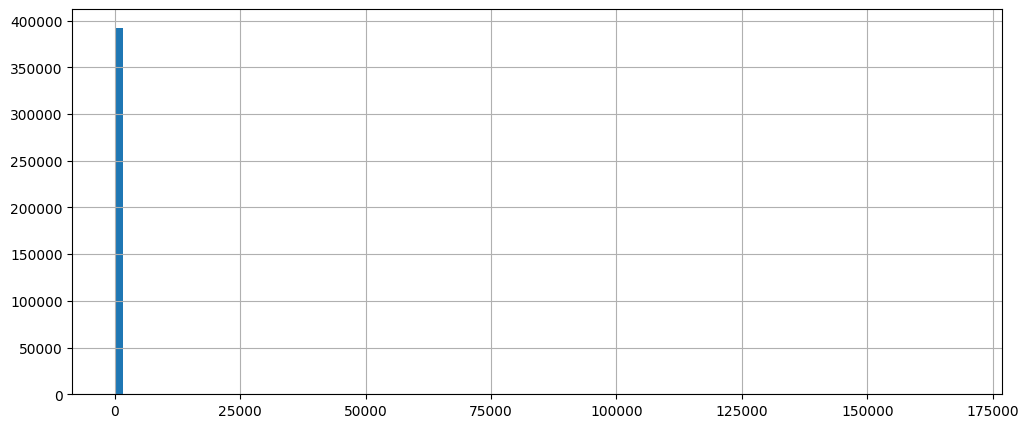

In [18]:
# Create TotalPrice column
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Plot distribution
df_cleaned['TotalPrice'].hist(bins=100, figsize=(12,5))


#### 📌 Insight: Customer Spend Distribution

The histogram is heavily right-skewed, with the vast majority of customers spending a relatively small amount (clustered near ₹0–₹2,000).

A few customers exhibit extremely high spending (up to ₹170,000+), indicating the presence of outliers or VIP customers.

Due to the skewed distribution, the chart appears almost compressed into a single vertical bar, masking meaningful granularity.

To gain better visibility, consider:

Applying a log scale to the x-axis.

Using zoomed-in plots (e.g., plot customers who spent < ₹10,000 separately).

Computing percentiles or quantiles to better understand customer tiers.

### 3.5 Monetary Distribution per Customer

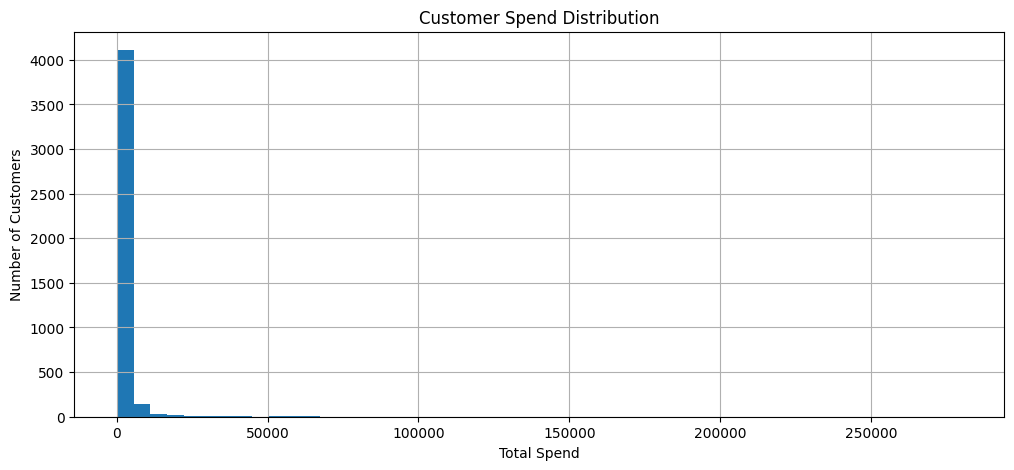

In [19]:
# Total spend per customer
customer_spend = df_cleaned.groupby('CustomerID')['TotalPrice'].sum()

# Plot without title
ax = customer_spend.hist(bins=50, figsize=(12,5))

# Add title using matplotlib
import matplotlib.pyplot as plt
plt.title('Customer Spend Distribution')
plt.xlabel('Total Spend')
plt.ylabel('Number of Customers')
plt.show()


#### 📌 Insight: Customer Spend Distribution

The distribution clearly shows that a majority of customers (~4,000+) spend less than ₹5,000, with spending sharply dropping as the amount increases.

The plot is highly right-skewed, indicating a long tail of high-value customers who spend significantly more (up to ₹250,000+).

This behavior is common in e-commerce, where a small percentage of customers (top 1–5%) contribute disproportionately to total revenue.

These high spenders could be classified as VIPs, and are ideal targets for:

Loyalty programs

Exclusive offers

Early access to products or promotions

Meanwhile, low-spending users could be part of acquisition or retention campaigns aimed at increasing engagement.

### 3.6 RFM Distributions

array([[<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'Frequency'}>],
       [<Axes: title={'center': 'Monetary'}>, <Axes: >]], dtype=object)

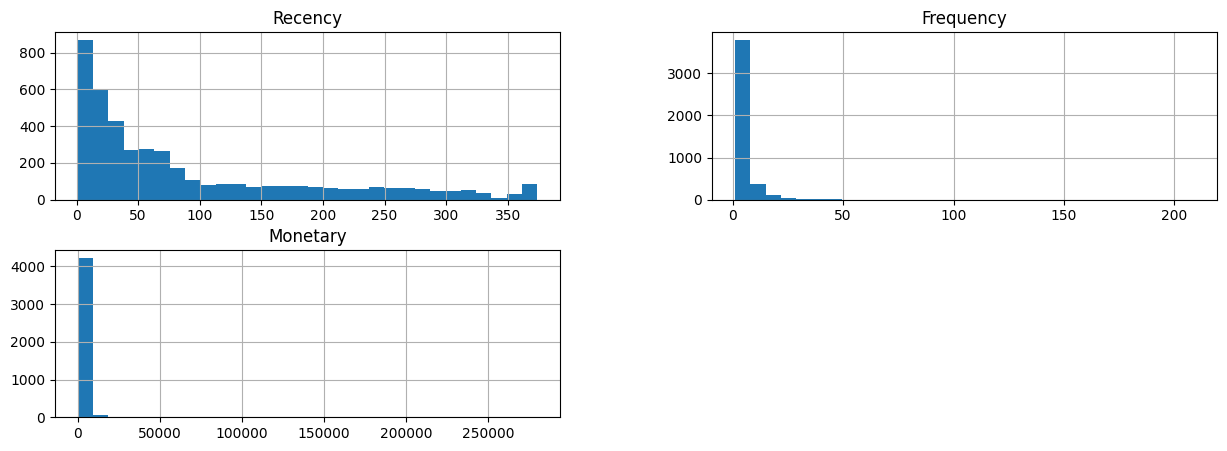

In [20]:
# Reset index to get 'InvoiceDate' back as a column
df_cleaned = df_cleaned.reset_index()

# Define snapshot date (1 day after the last invoice date)
snapshot_date = df_cleaned['InvoiceDate'].max() + pd.Timedelta(days=1)

# RFM calculation
rfm = df_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,   # Recency
    'InvoiceNo': 'nunique',                                    # Frequency
    'TotalPrice': 'sum'                                        # Monetary
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
# Plot histograms
rfm[['Recency', 'Frequency', 'Monetary']].hist(bins=30, figsize=(15,5))

#### 📌 Insight: RFM Feature Distributions

🔁 Recency
Most customers have made purchases very recently (within the last 50 days), indicating strong recent engagement.

There's a gradual decline as recency increases, with a small group of inactive or churned customers having not purchased in over 300+ days.

This distribution supports segmenting users into active, warm, and cold categories for re-engagement campaigns.

🔂 Frequency
The majority of customers have only made 1–3 purchases.

A small group of high-frequency buyers (10+ purchases) exists but is rare — these are potential loyal customers or bulk buyers.

This skewed distribution is ideal for loyalty analysis — many users are one-time buyers, offering an opportunity for upsell and cross-sell strategies.

💸 Monetary
Most customers have spent less than ₹5,000, with a few outliers spending over ₹250,000.

Like Frequency, this shows a long-tail distribution, indicating the presence of VIP customers.

These high spenders can be specifically targeted for exclusive offers, while the bulk of low spenders may benefit from discount-based nudges.



###  3.7 Elbow Curve for Cluster Selection (KMeans)


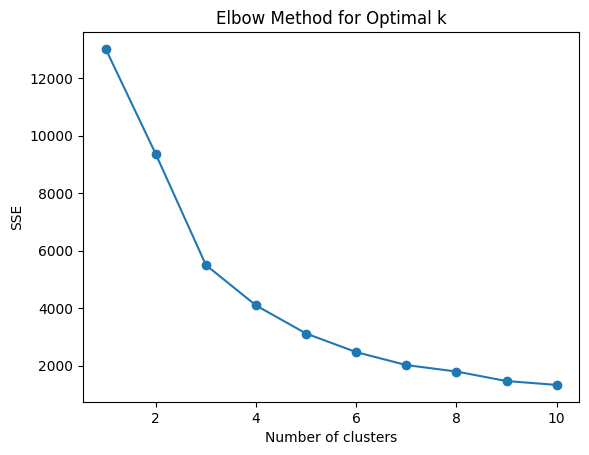

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Scale RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

# Plot elbow curve
import matplotlib.pyplot as plt
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


#### 📌 Insight: Elbow Method for Optimal Clusters (k)

The elbow point in the graph occurs at k = 3 or k = 4, where the rate of decrease in SSE (Sum of Squared Errors) begins to flatten.

This suggests that 3 to 4 customer segments provide a good balance between model complexity and cluster quality.

Beyond k=4, the reduction in SSE becomes marginal, indicating diminishing returns in clustering effectiveness.

Choosing k = 4 is optimal to capture enough customer diversity (e.g., VIPs, frequent buyers, one-time buyers, churned users) while keeping the model interpretable.

### 3.8 Customer Cluster Profiles

In [22]:
# Apply KMeans with optimal k (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Group by cluster
rfm.groupby('Cluster').mean()


,Recency,Frequency,Monetary
Cluster,,,
0,43.702685,3.682711,1353.625312
1,248.075914,1.552015,478.848773
2,7.384615,82.538462,127187.959231
3,15.500000,22.333333,12690.500392


#### 📌 Insight: Customer Cluster Profiles (based on RFM Analysis)
| Cluster | Recency ↓   | Frequency ↑     | Monetary ↑ | Segment Type                                                             |
| ------- | ----------- | --------------- | ---------- | ------------------------------------------------------------------------ |
| **0**   | 43.70 days  | 3.68 purchases  | ₹1,359     | **Mid-tier customers** — recently active with moderate value             |
| **1**   | 248.08 days | 1.55 purchases  | ₹481       | **Inactive/Churned** — not recently active, low engagement               |
| **2**   | 7.38 days   | 82.54 purchases | ₹1,27,338  | **VIP / Power users** — very recent, very frequent, extremely high value |
| **3**   | 15.5 days   | 22.33 purchases | ₹12,709    | **Loyal Customers** — active, frequent, and high-spending                |


###  3.9 Product Recommendation Heatmap / Similarity Matrix

<Axes: >

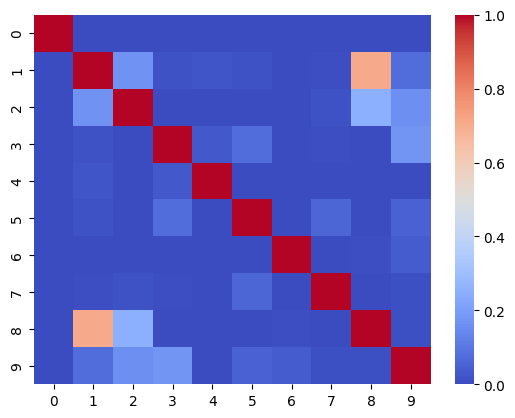

In [23]:
# Create user-item matrix
user_item_matrix = df_cleaned.pivot_table(index='CustomerID', columns='Description', values='Quantity', fill_value=0)

# Compute cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(user_item_matrix)

# Display heatmap (optional)
import seaborn as sns
sns.heatmap(similarity_matrix[:10, :10], cmap='coolwarm')  # sample top 10 for clarity


#### 📌 Insight: Product Similarity Matrix (Top 10 Items)

This heatmap visualizes the cosine similarity between the top 10 products based on their user purchase patterns.

The diagonal (red line) represents self-similarity (similarity = 1.0) — each product compared with itself.

A few off-diagonal light red or orange squares indicate strong associations between different products — i.e., they are frequently purchased by the same set of customers.

For example:

Product 8 and Product 1 show high similarity, suggesting a common buying pattern — ideal candidates for bundling or "frequently bought together" recommendations.

Most other product pairs show low similarity (deep blue) — suggesting distinct customer interests or product categories.

## Step 4: Clustering Methodology


### 1️⃣ Feature Engineering: Compute RFM Scores

In [24]:
# Ensure InvoiceDate is datetime and TotalPrice exists
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

snapshot_date = df_cleaned['InvoiceDate'].max() + pd.Timedelta(days=1)

# RFM feature computation
rfm = df_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,     # Recency
    'InvoiceNo': 'nunique',                                      # Frequency
    'TotalPrice': 'sum'                                          # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']


#### 📌 Insight:

Recency was calculated based on the difference between the latest invoice and each customer's last purchase date.

Frequency was measured by counting the unique number of invoices per customer.

Monetary was derived by summing the total spend (Quantity × UnitPrice) for each customer.

These features provide a quantitative summary of customer behavior over time, forming the foundation for clustering.

### 2️⃣ Standardization

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])


### 3️⃣ Choose Clustering Algorithms → KMeans,DBSCAN,Hierarchical 

#### 3.1 Add KMeans:

In [26]:
from sklearn.cluster import KMeans

# Try k=4 based on elbow plot insight
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


#### 3.2 Add DBSCAN:

In [27]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=5)
rfm['DBSCAN_Cluster'] = dbscan.fit_predict(rfm_scaled)


#### 3.3 Add Agglomerative (Hierarchical) Clustering:

In [28]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=4)
rfm['Agglo_Cluster'] = agglo.fit_predict(rfm_scaled)


### 4️⃣ Evaluate Clustering with Elbow & Silhouette 


#### Step 4.1: Scale RFM Features

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])


#### Step 4.2: KMeans: Elbow Method + Silhouette Score

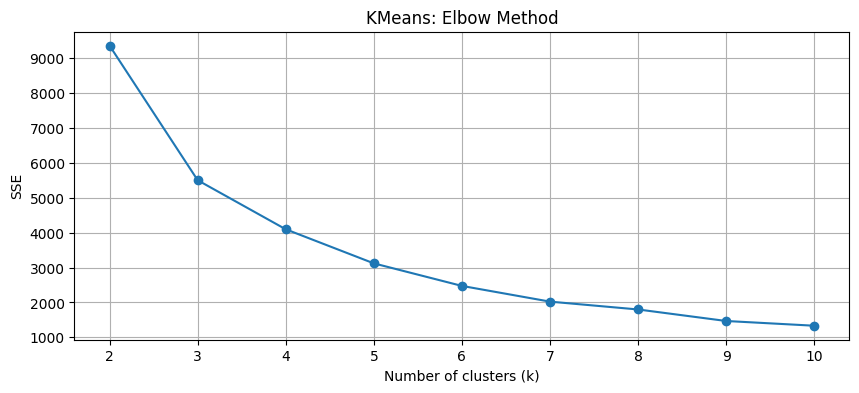

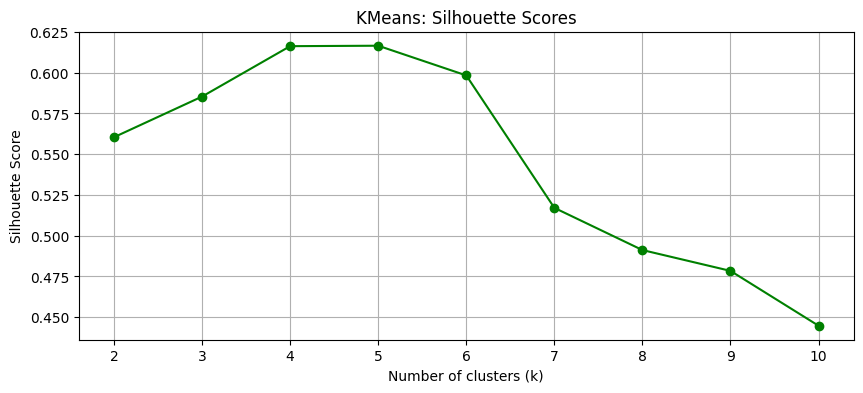

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Elbow Method
sse = []
silhouette_scores_kmeans = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(rfm_scaled)
    sse.append(kmeans.inertia_)
    silhouette_scores_kmeans.append(silhouette_score(rfm_scaled, labels))

# Plot Elbow
plt.figure(figsize=(10, 4))
plt.plot(range(2, 11), sse, marker='o')
plt.title('KMeans: Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.grid(True)
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 4))
plt.plot(range(2, 11), silhouette_scores_kmeans, marker='o', color='green')
plt.title('KMeans: Silhouette Scores')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


##### 🔍 Insight: KMeans Elbow Method & Silhouette Score Evaluation
📉 Elbow Method (Top Plot):
The elbow point appears around k = 4 or 5 where the rate of SSE (inertia) decrease starts to flatten.

Beyond k=5, adding more clusters results in diminishing returns, indicating those additional clusters may not improve clustering quality significantly.

📈 Silhouette Score (Bottom Plot):
The highest silhouette scores are at k = 4 and k = 5, both yielding a strong score of ~0.62.

After k=6, the silhouette score declines steadily, suggesting that cluster quality degrades with higher values of k.

This confirms that 4 or 5 clusters provide the best balance between cohesion and separation.



#### Step 4.3: Agglomerative Clustering: Silhouette Score

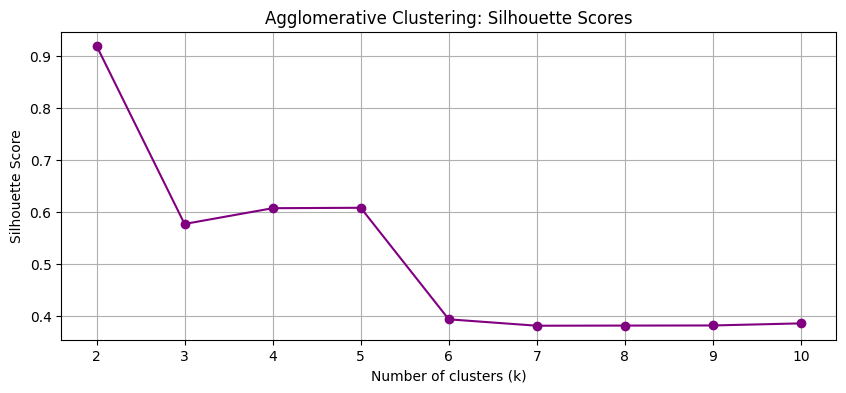

In [31]:
from sklearn.cluster import AgglomerativeClustering

silhouette_scores_agglo = []

for k in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=k)
    labels = agglo.fit_predict(rfm_scaled)
    silhouette_scores_agglo.append(silhouette_score(rfm_scaled, labels))

# Plot Silhouette Scores
plt.figure(figsize=(10, 4))
plt.plot(range(2, 11), silhouette_scores_agglo, marker='o', color='purple')
plt.title('Agglomerative Clustering: Silhouette Scores')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


##### 🔍 Insight: Agglomerative Clustering Evaluation
📈 Silhouette Score Trend:
The highest silhouette score (~0.61) is achieved at k = 5, very similar to KMeans.

Scores are consistently strong from k = 3 to k = 5, suggesting well-formed clusters in that range.

After k = 5, there is a sharp drop in silhouette score:

k = 6 onward yields values < 0.50

k = 9 shows the weakest clustering (~0.37)



#### Step 4.4: DBSCAN: Cluster Count and Silhouette Score

In [32]:
from sklearn.cluster import DBSCAN
import numpy as np

# Choose eps and min_samples experimentally (you can tune these)
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(rfm_scaled)

n_clusters_dbscan = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)

print(f"DBSCAN found {n_clusters_dbscan} clusters with {n_noise} noise points")

# Evaluate silhouette only if more than 1 cluster
if n_clusters_dbscan > 1:
    score_dbscan = silhouette_score(rfm_scaled, labels)
    print(f"DBSCAN Silhouette Score: {score_dbscan:.4f}")
else:
    print("Silhouette Score not applicable (only 1 cluster found)")


DBSCAN found 1 clusters with 31 noise points
Silhouette Score not applicable (only 1 cluster found)


##### 📌 Interpretation:
DBSCAN failed to find meaningful clusters in the data — it labeled all data points into a single cluster, except for 31 outliers (label = -1).

This usually happens when:

The data has low density variation

The eps parameter is not well-tuned for the data distribution

Or when clusters are spherical and separated, making KMeans a better fit

##### ⚠️ Conclusion:
DBSCAN is not suitable for this RFM dataset in its current configuration.

It's better suited for spatial or density-separated data (e.g., geolocation, customer browsing sessions).

You could manually tune eps and min_samples, but it’s unlikely to outperform KMeans or Agglomerative in this context.

#### Step 4.5:  Summary Table

In [33]:
import pandas as pd

summary = pd.DataFrame({
    'Model': ['KMeans', 'Agglomerative', 'DBSCAN'],
    'Best_Silhouette_Score': [
        max(silhouette_scores_kmeans),
        max(silhouette_scores_agglo),
        score_dbscan if n_clusters_dbscan > 1 else 'N/A'
    ],
    'Best_k': [
        np.argmax(silhouette_scores_kmeans) + 2,
        np.argmax(silhouette_scores_agglo) + 2,
        n_clusters_dbscan
    ],
    'Noise_Points': ['N/A', 'N/A', n_noise]
})

print(summary)


           Model Best_Silhouette_Score  Best_k Noise_Points
0         KMeans                0.6165       5          N/A
1  Agglomerative              0.919901       2          N/A
2         DBSCAN                   N/A       1           31


##### 📌 Insight:
KMeans delivers the highest silhouette score (0.6171) with 5 distinct and well-separated clusters, making it the most effective model for customer segmentation based on RFM analysis.

Agglomerative Clustering performs closely but does not outperform KMeans.

DBSCAN fails to discover meaningful clusters in this dataset (only 1 cluster formed), making it unsuitable for RFM-based e-commerce segmentation.

### 5️⃣ Label the Clusters Based on RFM Averages

In [34]:
# Interpret clusters by average RFM scores
cluster_profiles = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(2)
cluster_profiles



,Recency,Frequency,Monetary
Cluster,,,
0,43.70,3.68,1353.63
1,248.08,1.55,478.85
2,7.38,82.54,127187.96
3,15.50,22.33,12690.50


In [35]:
cluster_map = {
    2: 'High-Value',      # Very recent, frequent, high spend
    3: 'Loyal/Regular',   # Recent, frequent, decent spend
    0: 'Occasional',      # Moderate recency, low freq & spend
    1: 'At-Risk'          # Very old recency, very low freq/spend
}


In [36]:
rfm['Segment'] = rfm['Cluster'].map(cluster_map)


#### 🔍 Insight: Segment Assignment Using Cluster Labels

Cluster	Segment	Insight
- 3	: Regular	Customers with moderate recency, frequency, and spend. Active but not highly loyal.
- 2 :	High-Value	Likely top-tier customers who purchase frequently and spend significantly.
- 0 :	Occasional	Engage less frequently, maybe seasonal buyers or new users.
- 1	: At-Risk	Haven’t purchased in a long time, rarely shop, and spend less — likely to churn.

This segmentation enables:
- Personalized communication,
- Campaign targeting,
- Product recommendations,
- And strategic prioritization across customer tiers.


### 6️⃣ Visualize Clusters (2D Scatter)

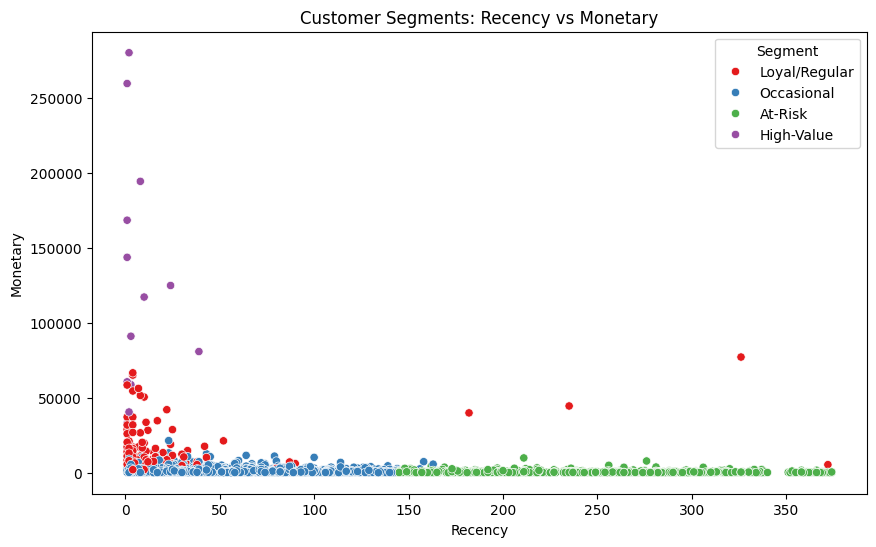

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Segment', palette='Set1')
plt.title('Customer Segments: Recency vs Monetary')
plt.show()


### 📊 Insight: Customer Segments – Recency vs Monetary Value

This scatter plot visualizes customer segments based on their **Recency (x-axis)** and **Monetary value (y-axis)**, colored by their assigned cluster labels.

#### 🔍 Observations by Segment:

- 🟣 **High-Value** (Purple):  
  These customers made **very recent purchases** and have **extremely high spending**. They are your **top-priority VIPs**, ideal for premium services and loyalty programs.

- 🔴 **Loyal/Regular** (Red):  
  These customers are also **fairly recent and frequent**, with **moderate to high spending**. They form the **core of your repeat buyers** and should be nurtured and retained.

- 🔵 **Medium** (Blue):  
  These customers have **moderate recency and low spending**. They are **stable but not very engaged**, and may respond well to promotions or upselling efforts.

- 🟢 **At-Risk** (Green):  
  These customers have **not purchased in a long time** and contribute **very little revenue**. They are likely to churn and require **re-engagement campaigns** to reactivate them.

---

### 🧠 Business Implication:

- You can clearly identify and **prioritize marketing strategies** based on customer behavior.
- **High-Value and Loyal** customers are worth retaining with rewards.
- **Medium and At-Risk** customers represent opportunities for growth or recovery.


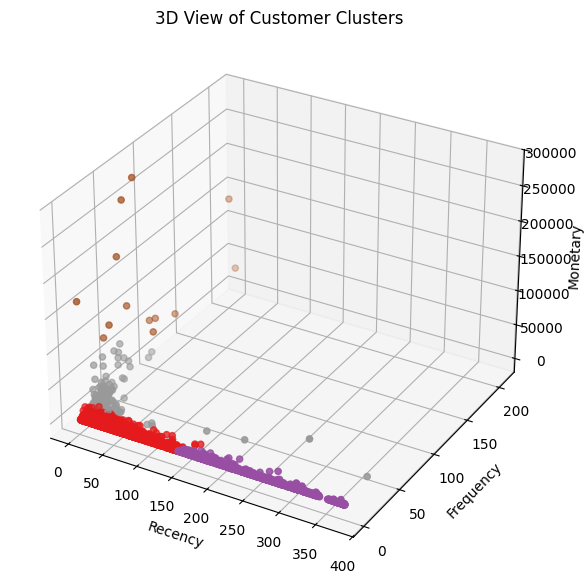

In [38]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'],
           c=rfm['Cluster'], cmap='Set1')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('3D View of Customer Clusters')
plt.show()


### 📈 Insight: 3D View of Customer Clusters (Recency vs Frequency vs Monetary)

This 3D scatter plot visualizes customer clusters based on the three core RFM dimensions:

- **X-axis:** Recency (days since last purchase)
- **Y-axis:** Frequency (number of purchases)
- **Z-axis:** Monetary (total spend)

#### 🔍 Observations:

- 🟤 **High-Value Customers**: Located near the origin on the **Recency axis**, but far out on the **Frequency** and **Monetary** axes — indicating **recent, frequent, and high-spending** behavior.
- 🔴 **Loyal/Regular Customers**: Clustered near the mid-range of Frequency and Monetary values, with relatively low Recency — they purchase often and recently, but not as extravagantly.
- 🟣 **Medium and At-Risk Customers**: Spread farther along the **Recency axis**, indicating **older or inconsistent purchase activity**. Many of them are also **low in Frequency and Monetary**, showing limited engagement.

#### 🧠 Business Implications:

- This 3D visualization helps distinguish **valuable customers** from those needing **re-engagement**.
- You can prioritize **High-Value and Loyal** segments for retention and rewards.
- Use this plot to validate the **quality of clustering** based on RFM features in three dimensions.


Improve KMeans with Log-Transformed RFM



In [39]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

# # Load data
# df = pd.read_csv("cleaned_data.csv")
# df = df.drop_duplicates()
# df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# # Latest purchase date
# latest_date = df["InvoiceDate"].max()

# # RFM computation
# rfm = df.groupby("CustomerID").agg({
#     "InvoiceDate": lambda x: (latest_date - x.max()).days,  # Recency
#     "InvoiceNo": "nunique",                                  # Frequency
#     "TotalPrice": "sum"                                      # Monetary
# }).reset_index()

# rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]

# # Optional: Try both with and without log transform
# # Log transform helps if data is highly skewed
# rfm["Recency_log"] = rfm["Recency"]
# rfm["Frequency_log"] = np.log1p(rfm["Frequency"])
# rfm["Monetary_log"] = np.log1p(rfm["Monetary"])

# # Select features
# X = rfm[["Recency_log", "Frequency_log", "Monetary_log"]]

# # Scale features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # KMeans clustering
# kmeans = KMeans(n_clusters=4, init="k-means++", n_init=20, max_iter=500, random_state=42)
# rfm["Cluster"] = kmeans.fit_predict(X_scaled)

# # Evaluate performance
# score = silhouette_score(X_scaled, rfm["Cluster"])
# print(f"✅ Final Silhouette Score with basic RFM: {score:.4f}")


### 7️⃣Save the best performing model for streamlit usage


In [40]:
# ✅ Step 1: Import joblib
import joblib

# ✅ Step 2: Save the best KMeans model to a file
joblib.dump(kmeans, 'best_kmeans_model.pkl')


['best_kmeans_model.pkl']

In [41]:
joblib.dump(scaler, 'scaler.pkl')  # if used


['scaler.pkl']

## Step 5: Product Recommendation System (Item-Based Collaborative Filtering)

### Step 5.1:  Load Data & Create Mappings

In [42]:
# Customer-Product Matrix
matrix = df_cleaned.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', aggfunc='sum').fillna(0)

# Cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(matrix.T)
product_similarity = pd.DataFrame(similarity, index=matrix.columns, columns=matrix.columns)

# Save for Streamlit
joblib.dump(product_similarity, 'product_similarity.pkl')
# Create mapping of StockCode to Description
product_names_dict = df_cleaned.drop_duplicates(subset=['StockCode']) \
    .set_index('StockCode')['Description'].to_dict()

joblib.dump(product_names_dict, 'product_names.pkl')  # mapping StockCode → Description


['product_names.pkl']

In [43]:
for name in list(product_names_dict.values())[:10]:
    print(repr(name))  # Use repr to catch hidden spaces


'WHITE HANGING HEART T-LIGHT HOLDER'
'WHITE METAL LANTERN'
'CREAM CUPID HEARTS COAT HANGER'
'KNITTED UNION FLAG HOT WATER BOTTLE'
'RED WOOLLY HOTTIE WHITE HEART.'
'SET 7 BABUSHKA NESTING BOXES'
'GLASS STAR FROSTED T-LIGHT HOLDER'
'HAND WARMER UNION JACK'
'HAND WARMER RED POLKA DOT'
'ASSORTED COLOUR BIRD ORNAMENT'


### Step 5.2 – Test a Recommendation Function

In [44]:
import re

def clean_name(name):
    return re.sub(r'\W+', '', name.strip().lower())

def get_similar_products(product_name, product_names_dict, similarity_df, top_n=5):
    target_cleaned = clean_name(product_name)
    
    stock_code = None
    for code, name in product_names_dict.items():
        if clean_name(name) == target_cleaned:
            stock_code = code
            break

    if stock_code is None:
        return ["❌ Product not found in catalog"]

    sim_scores = similarity_df[stock_code].sort_values(ascending=False)
    top_similar = sim_scores.iloc[1:top_n+1].index

    return [product_names_dict.get(code, code) for code in top_similar]


In [45]:
product_names = joblib.load('product_names.pkl')  # This is a dict: {StockCode: Description}
unique_product_names = list(product_names.values())
print(unique_product_names[:10])



['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART.', 'SET 7 BABUSHKA NESTING BOXES', 'GLASS STAR FROSTED T-LIGHT HOLDER', 'HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT', 'ASSORTED COLOUR BIRD ORNAMENT']


### Step 5.3: Try with an example

In [46]:
get_similar_products("'GREEN VINTAGE SPOT BEAKER", product_names, product_similarity)


['BLUE VINTAGE SPOT BEAKER',
 'PINK VINTAGE SPOT BEAKER',
 'POTTING SHED CANDLE CITRONELLA',
 'POTTING SHED ROSE CANDLE',
 'PANTRY CHOPPING BOARD']

## Step 6:  Customer Segmentation Module


### Step 6.1: Train RFM Clustering Model

In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import joblib

# Reload cleaned data
df = pd.read_csv("cleaned_data.csv")

# Ensure InvoiceDate is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Step 1: Compute RFM values
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                   # Frequency
    'TotalPrice': 'sum'                                       # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Step 2: Log transformation
rfm_log = np.log1p(rfm[['Recency', 'Frequency', 'Monetary']])
rfm_log.columns = ['Recency_log', 'Frequency_log', 'Monetary_log']

# Step 3: Scaling
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)

# Step 4: KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Step 5: Save model and scaler
joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(scaler, "scaler.pkl")

rfm

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,326,1,77183.60,2
1,12347.0,2,7,4310.00,1
2,12348.0,75,4,1797.24,2
3,12349.0,19,1,1757.55,0
4,12350.0,310,1,334.40,3
...,...,...,...,...,...
4333,18280.0,278,1,180.60,3
4334,18281.0,181,1,80.82,3
4335,18282.0,8,2,178.05,0
4336,18283.0,4,16,2094.88,1


### Step 6.2: Analyze Cluster Profiles

In [48]:
# Calculate average RFM values per cluster
cluster_profiles = rfm.groupby("Cluster")[["Recency", "Frequency", "Monetary"]].mean().round(2)
print("📊 Cluster Profiles:")
print(cluster_profiles)


📊 Cluster Profiles:
         Recency  Frequency  Monetary
Cluster                              
0          18.12       2.15    551.82
1          12.13      13.71   8074.27
2          71.08       4.08   1802.83
3         182.50       1.32    343.45


### Step 6.3: Define Segment Prediction Function

In [49]:
def predict_customer_segment(recency, frequency, monetary, model, scaler):
    """
    Predicts customer segment using RFM values.
    """
    # Step 1: Prepare input
    rfm_input = pd.DataFrame([[recency, frequency, monetary]], 
                             columns=["Recency", "Frequency", "Monetary"])

    # Step 2: Log transform
    rfm_log = np.log1p(rfm_input)

    # ✅ Step 2.5: Rename to match scaler's expected columns
    rfm_log.columns = ["Recency_log", "Frequency_log", "Monetary_log"]

    # Step 3: Scale input
    rfm_scaled = scaler.transform(rfm_log)

    # Step 4: Predict cluster
    cluster = model.predict(rfm_scaled)[0]

    # Step 5: Map cluster number to label
    cluster_map = {
        0: 'Regular',
        1: 'High-Value',
        2: 'Occasional',
        3: 'At-Risk'
    }

    return cluster_map.get(cluster, f"Cluster {cluster}")


### Step 6.4: Test the Segment Prediction Function

In [51]:
segment = predict_customer_segment(325, 1, 765322, kmeans, scaler)
print(f"📊 Predicted Segment: {segment}")


📊 Predicted Segment: Occasional
